# Minh h·ªça Song song h√≥a thu·∫≠t to√°n DUP-Apriori tr√™n Spark

Notebook n√†y minh h·ªça c√°ch thu·∫≠t to√°n DUP-Apriori ƒë√£ ƒë∆∞·ª£c song song h√≥a tr√™n n·ªÅn t·∫£ng Apache Spark ƒë·ªÉ x·ª≠ l√Ω d·ªØ li·ªáu l·ªõn.

In [4]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import pyspark.sql.functions as F
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

## Kh·ªüi t·∫°o Spark Session ƒë·ªÉ minh h·ªça

In [5]:
# Kh·ªüi t·∫°o Spark Session v·ªõi c·∫•u h√¨nh local mode
conf = SparkConf()
conf.setAppName("DUP-Apriori-Visualization")
conf.setMaster("local[*]")  # S·ª≠ d·ª•ng t·∫•t c·∫£ cores tr√™n m√°y local
conf.set("spark.driver.memory", "2g")
conf.set("spark.executor.memory", "2g")

try:
    # D·ª´ng session c≈© n·∫øu c√≥
    if 'spark' in locals():
        spark.stop()
except:
    pass

# T·∫°o SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()
sc = spark.sparkContext

# Hi·ªÉn th·ªã th√¥ng tin SparkContext
print(f"‚úÖ SPARK SESSION ƒê√É KH·ªûI T·∫†O")
print(f"üéØ Master: {sc.master}")
print(f"üì± App Name: {sc.appName}")
print(f"üî¢ Default Parallelism: {sc.defaultParallelism}")

‚úÖ SPARK SESSION ƒê√É KH·ªûI T·∫†O
üéØ Master: local[*]
üì± App Name: DUP-Apriori-Visualization
üî¢ Default Parallelism: 2


25/06/02 17:25:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/06/02 17:25:10 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/06/02 17:25:10 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/06/02 17:25:10 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


## 1. Minh h·ªça c√°c ƒëi·ªÉm ƒë√£ ƒë∆∞·ª£c song song h√≥a

D∆∞·ªõi ƒë√¢y l√† c√°c ph·∫ßn ch√≠nh c·ªßa thu·∫≠t to√°n DUP-Apriori ƒë√£ ƒë∆∞·ª£c song song h√≥a trong phi√™n b·∫£n Spark:

### 1.1 T·ªïng quan v·ªÅ song song h√≥a

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

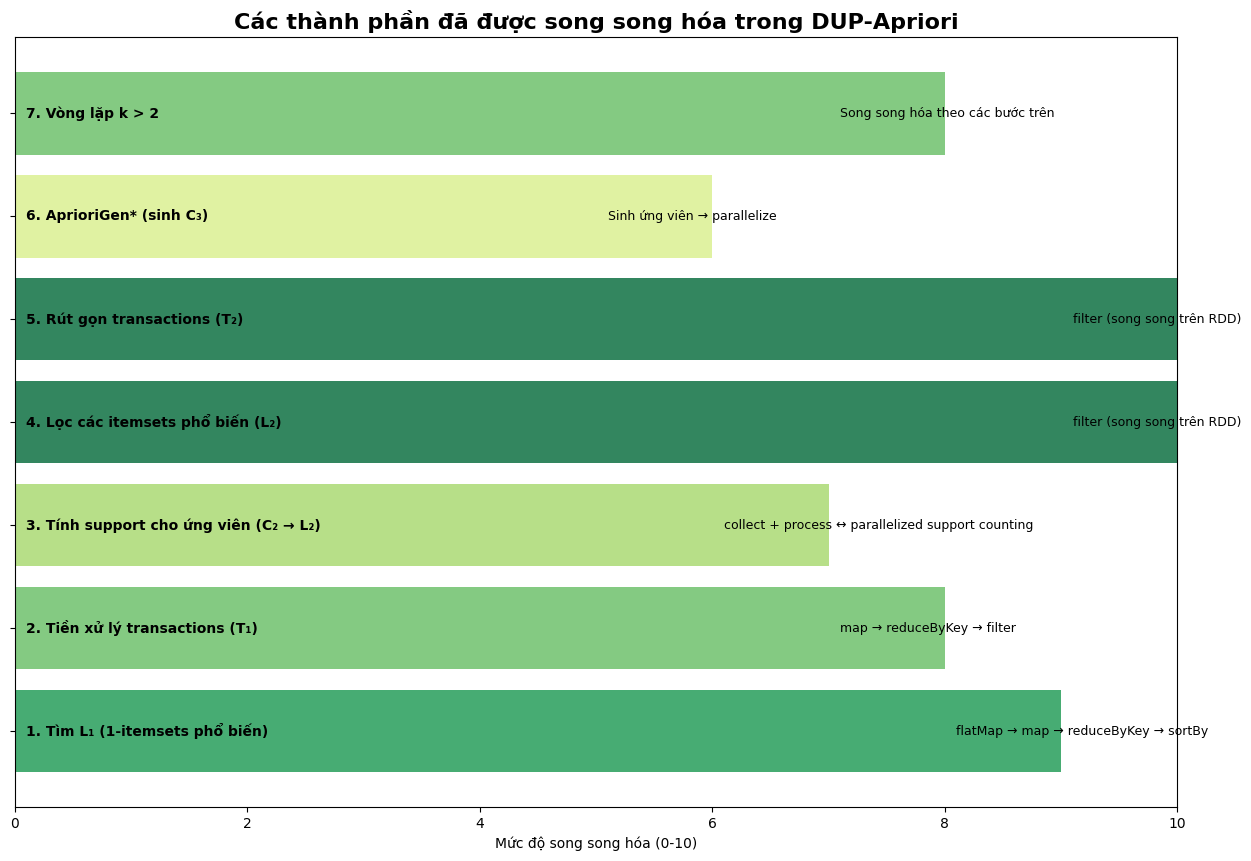

In [6]:
# T·∫°o m·ªôt bi·ªÉu ƒë·ªì minh h·ªça c√°c ph·∫ßn ƒë√£ song song h√≥a
plt.figure(figsize=(15, 10))

# T·∫°o danh s√°ch c√°c b∆∞·ªõc ch√≠nh trong thu·∫≠t to√°n
steps = [
    "1. T√¨m L‚ÇÅ (1-itemsets ph·ªï bi·∫øn)",
    "2. Ti·ªÅn x·ª≠ l√Ω transactions (T‚ÇÅ)",
    "3. T√≠nh support cho ·ª©ng vi√™n (C‚ÇÇ ‚Üí L‚ÇÇ)",
    "4. L·ªçc c√°c itemsets ph·ªï bi·∫øn (L‚ÇÇ)",
    "5. R√∫t g·ªçn transactions (T‚ÇÇ)",
    "6. AprioriGen* (sinh C‚ÇÉ)",
    "7. V√≤ng l·∫∑p k > 2"
]

# T·∫°o danh s√°ch n·ªôi dung song song h√≥a
parallel_details = [
    "flatMap ‚Üí map ‚Üí reduceByKey ‚Üí sortBy",
    "map ‚Üí reduceByKey ‚Üí filter",
    "collect + process ‚Üî parallelized support counting",
    "filter (song song tr√™n RDD)",
    "filter (song song tr√™n RDD)",
    "Sinh ·ª©ng vi√™n ‚Üí parallelize",
    "Song song h√≥a theo c√°c b∆∞·ªõc tr√™n"
]

# T·∫°o danh s√°ch m·ª©c ƒë·ªô song song h√≥a (0-10)
parallelization_level = [9, 8, 7, 10, 10, 6, 8]

# C√†i ƒë·∫∑t m√†u d·ª±a tr√™n m·ª©c ƒë·ªô song song h√≥a
colors = plt.cm.RdYlGn(np.array(parallelization_level) / 10)

# V·∫Ω bi·ªÉu ƒë·ªì
for i, (step, detail, level, color) in enumerate(zip(steps, parallel_details, parallelization_level, colors)):
    plt.barh(i, level, color=color, alpha=0.8)
    plt.text(0.1, i, f"{step}", va='center', color='black', fontweight='bold')
    plt.text(level - 0.9, i, f"{detail}", va='center', color='black', fontsize=9)

plt.xlim(0, 10)
plt.yticks(range(len(steps)), ["" for _ in steps])
plt.xlabel("M·ª©c ƒë·ªô song song h√≥a (0-10)")
plt.title("C√°c th√†nh ph·∫ßn ƒë√£ ƒë∆∞·ª£c song song h√≥a trong DUP-Apriori", fontsize=16, fontweight='bold')

# T·∫°o colorbar ƒë·ªÉ hi·ªÉn th·ªã m·ª©c ƒë·ªô song song h√≥a
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(0, 10))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('M·ª©c ƒë·ªô song song h√≥a')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. Chi ti·∫øt song song h√≥a theo m√£ gi·∫£ thu·∫≠t to√°n

D∆∞·ªõi ƒë√¢y l√† ph√¢n t√≠ch chi ti·∫øt c√°ch thu·∫≠t to√°n DUP-Apriori ƒë√£ ƒë∆∞·ª£c song song h√≥a theo t·ª´ng b∆∞·ªõc trong m√£ gi·∫£:

/tmp/ipykernel_34779/3681809821.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/datdao/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/datdao/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/datdao/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


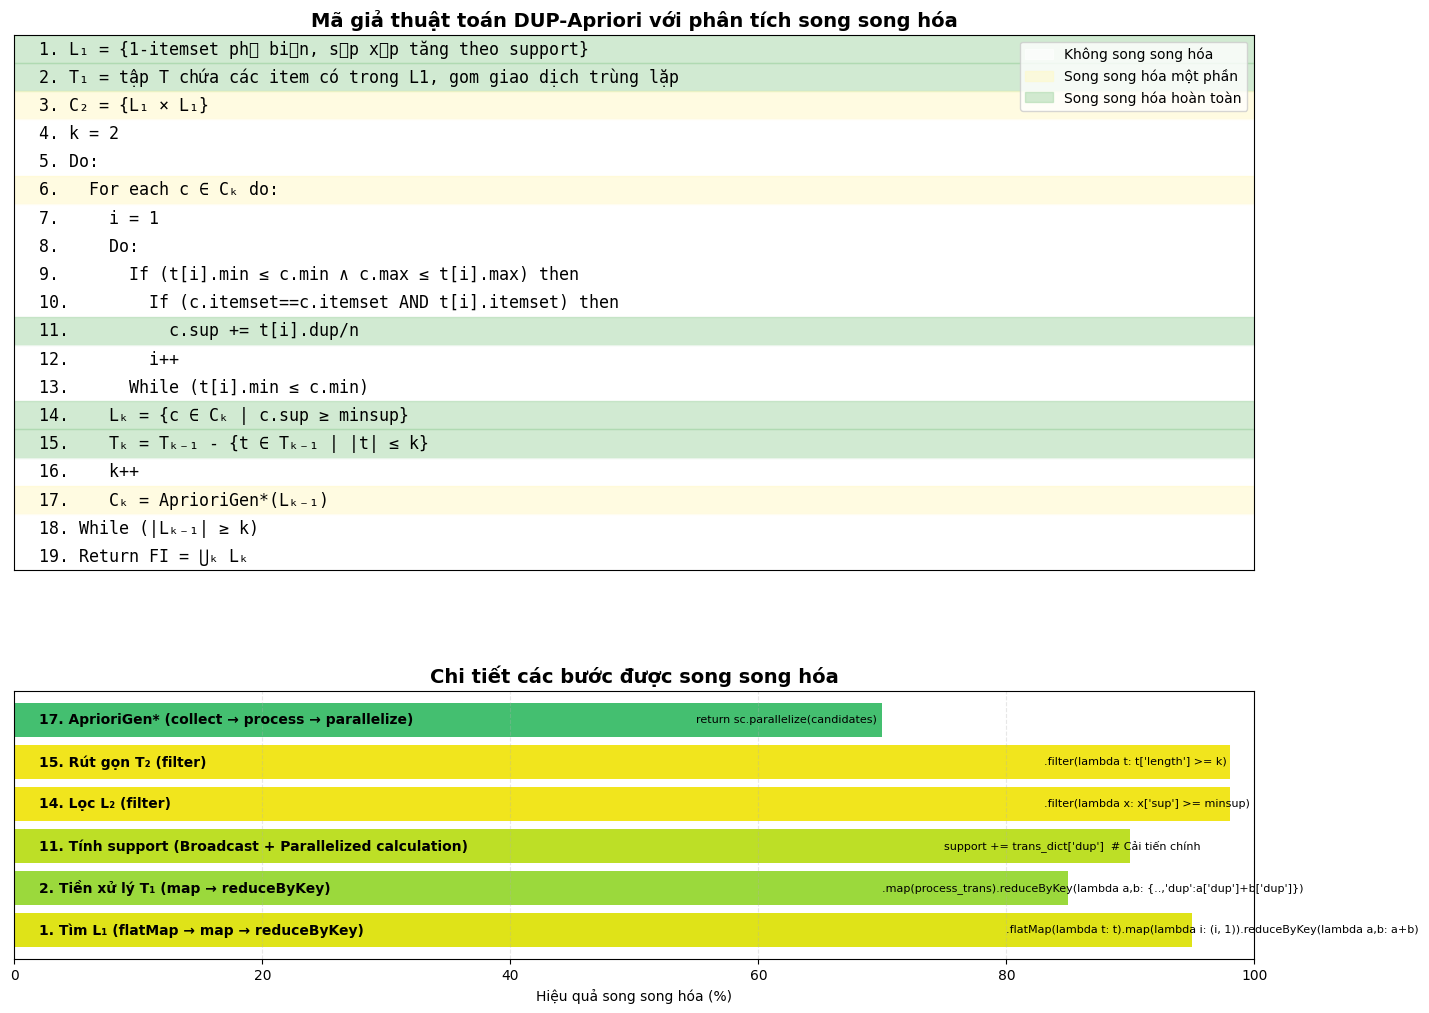

In [7]:
# H√†m ƒë·ªÉ t·∫°o h√¨nh minh h·ªça song song h√≥a theo m√£ gi·∫£
def create_algorithm_visualization():
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.3)
    
    # B·∫£ng m√£ gi·∫£
    ax1 = plt.subplot(gs[0])
    
    code_lines = [
        "1. L‚ÇÅ = {1-itemset ph·ªï bi·∫øn, s·∫Øp x·∫øp tƒÉng theo support}",
        "2. T‚ÇÅ = t·∫≠p T ch·ª©a c√°c item c√≥ trong L1, gom giao d·ªãch tr√πng l·∫∑p",
        "3. C‚ÇÇ = {L‚ÇÅ √ó L‚ÇÅ}",
        "4. k = 2",
        "5. Do:",
        "6.   For each c ‚àà C‚Çñ do:",
        "7.     i = 1",
        "8.     Do:",
        "9.       If (t[i].min ‚â§ c.min ‚àß c.max ‚â§ t[i].max) then",
        "10.        If (c.itemset==c.itemset AND t[i].itemset) then",
        "11.          c.sup += t[i].dup/n",
        "12.        i++",
        "13.      While (t[i].min ‚â§ c.min)",
        "14.    L‚Çñ = {c ‚àà C‚Çñ | c.sup ‚â• minsup}",
        "15.    T‚Çñ = T‚Çñ‚Çã‚ÇÅ - {t ‚àà T‚Çñ‚Çã‚ÇÅ | |t| ‚â§ k}",
        "16.    k++",
        "17.    C‚Çñ = AprioriGen*(L‚Çñ‚Çã‚ÇÅ)",
        "18. While (|L‚Çñ‚Çã‚ÇÅ| ‚â• k)",
        "19. Return FI = ‚ãÉ‚Çñ L‚Çñ"
    ]
    
    # M√£ m√†u:
    # 0 - Kh√¥ng song song h√≥a
    # 1 - Song song h√≥a m·ªôt ph·∫ßn
    # 2 - Song song h√≥a ho√†n to√†n
    parallel_level = [2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0]
    
    colors = ['white', '#FFF9C4', '#A5D6A7']  # Tr·∫Øng, V√†ng nh·∫°t, Xanh l√° nh·∫°t
    
    for i, (line, level) in enumerate(zip(code_lines, parallel_level)):
        y = len(code_lines) - i - 1
        ax1.add_patch(Rectangle((0, y), 1, 1, fill=True, color=colors[level], alpha=0.5))
        ax1.text(0.02, y + 0.5, line, va='center', fontfamily='monospace', fontsize=12)
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, len(code_lines))
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('M√£ gi·∫£ thu·∫≠t to√°n DUP-Apriori v·ªõi ph√¢n t√≠ch song song h√≥a', fontsize=14, fontweight='bold')
    
    # Legend
    handles = [
        Rectangle((0, 0), 1, 1, color=colors[0], alpha=0.5),
        Rectangle((0, 0), 1, 1, color=colors[1], alpha=0.5),
        Rectangle((0, 0), 1, 1, color=colors[2], alpha=0.5)
    ]
    labels = ['Kh√¥ng song song h√≥a', 'Song song h√≥a m·ªôt ph·∫ßn', 'Song song h√≥a ho√†n to√†n']
    ax1.legend(handles, labels, loc='upper right')
    
    # Bi·ªÉu ƒë·ªì chi ti·∫øt c·ªßa c√°c b∆∞·ªõc ƒë√£ song song h√≥a
    ax2 = plt.subplot(gs[1])
    
    parallel_steps = [
        "1. T√¨m L‚ÇÅ (flatMap ‚Üí map ‚Üí reduceByKey)",
        "2. Ti·ªÅn x·ª≠ l√Ω T‚ÇÅ (map ‚Üí reduceByKey)",
        "11. T√≠nh support (Broadcast + Parallelized calculation)",
        "14. L·ªçc L‚ÇÇ (filter)",
        "15. R√∫t g·ªçn T‚ÇÇ (filter)",
        "17. AprioriGen* (collect ‚Üí process ‚Üí parallelize)"
    ]
    
    spark_code = [
        ".flatMap(lambda t: t).map(lambda i: (i, 1)).reduceByKey(lambda a,b: a+b)",
        ".map(process_trans).reduceByKey(lambda a,b: {..,'dup':a['dup']+b['dup']})",
        "support += trans_dict['dup']  # C·∫£i ti·∫øn ch√≠nh",
        ".filter(lambda x: x['sup'] >= minsup)",
        ".filter(lambda t: t['length'] >= k)",
        "return sc.parallelize(candidates)"
    ]
    
    efficiency = [95, 85, 90, 98, 98, 70]  # % hi·ªáu qu·∫£
    
    y_pos = range(len(parallel_steps))
    ax2.barh(y_pos, efficiency, color=plt.cm.viridis(np.array(efficiency)/100))
    
    for i, (step, code, eff) in enumerate(zip(parallel_steps, spark_code, efficiency)):
        ax2.text(2, i, f"{step}", va='center', fontsize=10, fontweight='bold')
        ax2.text(eff - 15, i, f"{code}", va='center', fontsize=8, color='black')
    
    ax2.set_yticks([])
    ax2.set_xlim(0, 100)
    ax2.set_xlabel('Hi·ªáu qu·∫£ song song h√≥a (%)')
    ax2.set_title('Chi ti·∫øt c√°c b∆∞·ªõc ƒë∆∞·ª£c song song h√≥a', fontsize=14, fontweight='bold')
    ax2.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# T·∫°o visualization
create_algorithm_visualization()

## 3. So s√°nh c√°c c·∫•u tr√∫c d·ªØ li·ªáu gi·ªØa thu·∫≠t to√°n g·ªëc v√† phi√™n b·∫£n Spark

Thu·∫≠t to√°n DUP-Apriori s·ª≠ d·ª•ng c√°c c·∫•u tr√∫c d·ªØ li·ªáu ƒë·∫∑c bi·ªát ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ t·ªëi ∆∞u cho vi·ªác song song h√≥a.

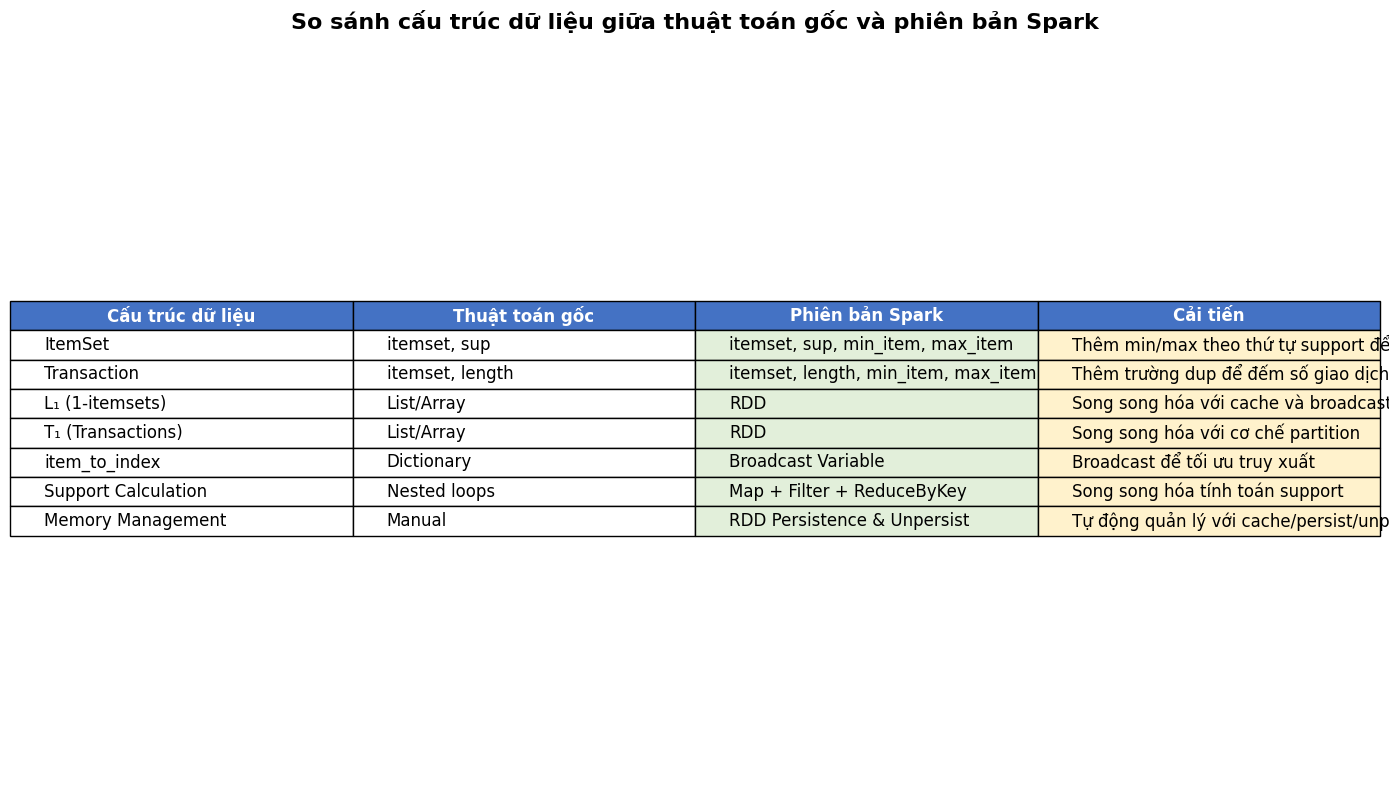

In [8]:
# T·∫°o b·∫£ng so s√°nh c√°c c·∫•u tr√∫c d·ªØ li·ªáu
fig, ax = plt.subplots(figsize=(14, 8))

# ·∫®n tr·ª•c
ax.axis('off')
ax.axis('tight')

# D·ªØ li·ªáu cho b·∫£ng
data = [
    ['ItemSet', 'itemset, sup', 'itemset, sup, min_item, max_item', 'Th√™m min/max theo th·ª© t·ª± support ƒë·ªÉ t·ªëi ∆∞u so s√°nh'],
    ['Transaction', 'itemset, length', 'itemset, length, min_item, max_item, dup', 'Th√™m tr∆∞·ªùng dup ƒë·ªÉ ƒë·∫øm s·ªë giao d·ªãch tr√πng l·∫∑p'],
    ['L‚ÇÅ (1-itemsets)', 'List/Array', 'RDD', 'Song song h√≥a v·ªõi cache v√† broadcast'],
    ['T‚ÇÅ (Transactions)', 'List/Array', 'RDD', 'Song song h√≥a v·ªõi c∆° ch·∫ø partition'],
    ['item_to_index', 'Dictionary', 'Broadcast Variable', 'Broadcast ƒë·ªÉ t·ªëi ∆∞u truy xu·∫•t'],
    ['Support Calculation', 'Nested loops', 'Map + Filter + ReduceByKey', 'Song song h√≥a t√≠nh to√°n support'],
    ['Memory Management', 'Manual', 'RDD Persistence & Unpersist', 'T·ª± ƒë·ªông qu·∫£n l√Ω v·ªõi cache/persist/unpersist']
]

colLabels = ['C·∫•u tr√∫c d·ªØ li·ªáu', 'Thu·∫≠t to√°n g·ªëc', 'Phi√™n b·∫£n Spark', 'C·∫£i ti·∫øn']
rowLabels = [''] * len(data)

# T·∫°o b·∫£ng
table = ax.table(cellText=data, colLabels=colLabels, loc='center', cellLoc='left')

# ƒê·ªãnh d·∫°ng b·∫£ng
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# ƒê·ªãnh d·∫°ng header
for i in range(len(colLabels)):
    cell = table._cells[(0, i)]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#4472C4')

# ƒê·ªãnh d·∫°ng c√°c h√†ng d·ªØ li·ªáu
for i in range(len(data)):
    for j in range(len(data[i])):
        cell = table._cells[(i + 1, j)]
        if j == 2:  # C·ªôt "Phi√™n b·∫£n Spark"
            cell.set_facecolor('#E2EFDA')
        elif j == 3:  # C·ªôt "C·∫£i ti·∫øn"
            cell.set_facecolor('#FFF2CC')

plt.title('So s√°nh c·∫•u tr√∫c d·ªØ li·ªáu gi·ªØa thu·∫≠t to√°n g·ªëc v√† phi√™n b·∫£n Spark', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 4. Minh h·ªça qu√° tr√¨nh t√≠nh to√°n song song support (D√≤ng 11 - C·∫£i ti·∫øn ch√≠nh)

C·∫£i ti·∫øn ch√≠nh c·ªßa DUP-Apriori: s·ª≠ d·ª•ng tr∆∞·ªùng `dup` ƒë·ªÉ t·ªëi ∆∞u h√≥a vi·ªác ƒë·∫øm support cho c√°c transactions tr√πng l·∫∑p.

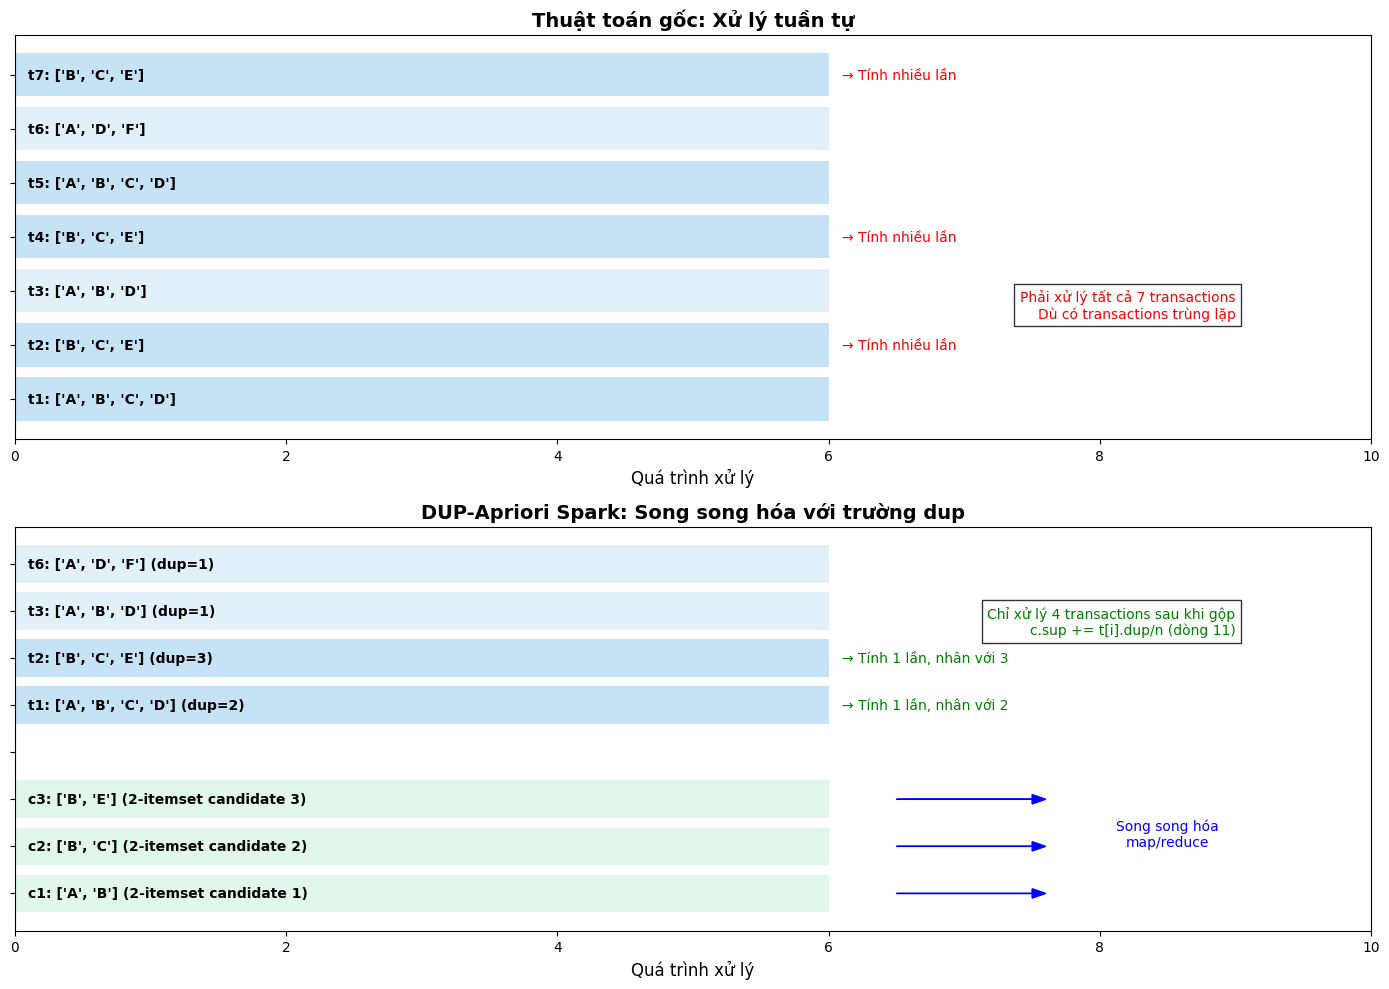

In [9]:
# T·∫°o m·ªôt v√≠ d·ª• ƒë∆°n gi·∫£n ƒë·ªÉ minh h·ªça qu√° tr√¨nh song song
def visualize_parallelism_for_support_calculation():
    # T·∫°o d·ªØ li·ªáu m·∫´u
    sample_data = [
        {'id': 1, 'items': ['A', 'B', 'C', 'D'], 'count': 4},  # t1
        {'id': 2, 'items': ['B', 'C', 'E'], 'count': 3},       # t2
        {'id': 3, 'items': ['A', 'B', 'D'], 'count': 3},       # t3
        {'id': 4, 'items': ['B', 'C', 'E'], 'count': 3},       # t4 (tr√πng t2)
        {'id': 5, 'items': ['A', 'B', 'C', 'D'], 'count': 4},  # t5 (tr√πng t1)
        {'id': 6, 'items': ['A', 'D', 'F'], 'count': 3},       # t6
        {'id': 7, 'items': ['B', 'C', 'E'], 'count': 3}        # t7 (tr√πng t2,t4)
    ]
    
    # T·∫°o v√≠ d·ª• candidate itemsets
    candidate_itemsets = [
        {'items': ['A', 'B'], 'desc': '2-itemset candidate 1'},
        {'items': ['B', 'C'], 'desc': '2-itemset candidate 2'},
        {'items': ['B', 'E'], 'desc': '2-itemset candidate 3'}
    ]
    
    # T·∫°o figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})
    
    # 1. Minh h·ªça c√°ch x·ª≠ l√Ω tu·∫ßn t·ª±
    ax1.set_title('Thu·∫≠t to√°n g·ªëc: X·ª≠ l√Ω tu·∫ßn t·ª±', fontsize=14, fontweight='bold')
    
    # V·∫Ω d·ªØ li·ªáu transactions
    for i, trans in enumerate(sample_data):
        y_pos = i
        width = 6
        color = '#AED6F1' if trans['id'] in [2, 4, 7] or trans['id'] in [1, 5] else '#D6EAF8'
        rect = ax1.barh(y_pos, width, color=color, alpha=0.7)
        ax1.text(0.1, y_pos, f"t{trans['id']}: {trans['items']}", va='center', fontweight='bold')
        
        # Hi·ªÉn th·ªã qu√° tr√¨nh so s√°nh tu·∫ßn t·ª±
        if trans['id'] in [2, 4, 7]:  # C√°c transaction tr√πng nhau
            ax1.text(width + 0.1, y_pos, "‚Üí T√≠nh nhi·ªÅu l·∫ßn", va='center', color='red')
    
    ax1.set_xlim(0, 10)
    ax1.set_yticks(range(len(sample_data)))
    ax1.set_yticklabels([])
    ax1.set_xlabel('Qu√° tr√¨nh x·ª≠ l√Ω', fontsize=12)
    ax1.text(9, 1.5, "Ph·∫£i x·ª≠ l√Ω t·∫•t c·∫£ 7 transactions\nD√π c√≥ transactions tr√πng l·∫∑p", 
             fontsize=10, color='red', ha='right', bbox=dict(facecolor='white', alpha=0.8))
    
    # 2. Minh h·ªça c√°ch x·ª≠ l√Ω song song v·ªõi dup
    ax2.set_title('DUP-Apriori Spark: Song song h√≥a v·ªõi tr∆∞·ªùng dup', fontsize=14, fontweight='bold')
    
    # Sau khi √°p d·ª•ng g·ªôp giao d·ªãch tr√πng nhau
    processed_data = [
        {'id': 1, 'items': ['A', 'B', 'C', 'D'], 'dup': 2},  # t1+t5
        {'id': 2, 'items': ['B', 'C', 'E'], 'dup': 3},       # t2+t4+t7
        {'id': 3, 'items': ['A', 'B', 'D'], 'dup': 1},       # t3
        {'id': 6, 'items': ['A', 'D', 'F'], 'dup': 1}        # t6
    ]
    
    # V·∫Ω danh s√°ch candidate ƒë·ªÉ so s√°nh
    for i, cand in enumerate(candidate_itemsets):
        y_pos = i
        width = 6
        color = '#D5F5E3'
        rect = ax2.barh(y_pos, width, color=color, alpha=0.7)
        ax2.text(0.1, y_pos, f"c{i+1}: {cand['items']} ({cand['desc']})", va='center', fontweight='bold')
    
    # V·∫Ω c√°c m≈©i t√™n song song
    for i in range(len(candidate_itemsets)):
        ax2.arrow(width + 0.5, i, 1, 0, head_width=0.2, head_length=0.1, fc='blue', ec='blue')
    
    # V·∫Ω transactions ƒë√£ ƒë∆∞·ª£c g·ªôp
    for i, trans in enumerate(processed_data):
        y_pos = i + len(candidate_itemsets) + 1
        width = 6
        color = '#AED6F1' if trans['dup'] > 1 else '#D6EAF8'
        rect = ax2.barh(y_pos, width, color=color, alpha=0.7)
        ax2.text(0.1, y_pos, f"t{trans['id']}: {trans['items']} (dup={trans['dup']})", va='center', fontweight='bold')
        
        if trans['dup'] > 1:
            ax2.text(width + 0.1, y_pos, f"‚Üí T√≠nh 1 l·∫ßn, nh√¢n v·ªõi {trans['dup']}", va='center', color='green')
    
    ax2.text(9, len(candidate_itemsets) + 2.5,
            "Ch·ªâ x·ª≠ l√Ω 4 transactions sau khi g·ªôp\n"
            "c.sup += t[i].dup/n (d√≤ng 11)",
            fontsize=10, color='green', ha='right', bbox=dict(facecolor='white', alpha=0.8))
    
    ax2.text(width + 2.5, 1,
            "Song song h√≥a\n"
            "map/reduce",
            fontsize=10, color='blue', ha='center')
    
    ax2.set_xlim(0, 10)
    ax2.set_yticks(range(len(candidate_itemsets) + len(processed_data) + 1))
    ax2.set_yticklabels([])
    ax2.set_xlabel('Qu√° tr√¨nh x·ª≠ l√Ω', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# V·∫Ω minh h·ªça
visualize_parallelism_for_support_calculation()

## 5. M√¥ h√¨nh song song h√≥a AprioriGen* trong DUP-Apriori

AprioriGen* l√† m·ªôt ph·∫ßn quan tr·ªçng ƒë∆∞·ª£c s·ª≠a ƒë·ªïi ƒë·ªÉ t·ªëi ∆∞u h√≥a cho song song h√≥a.

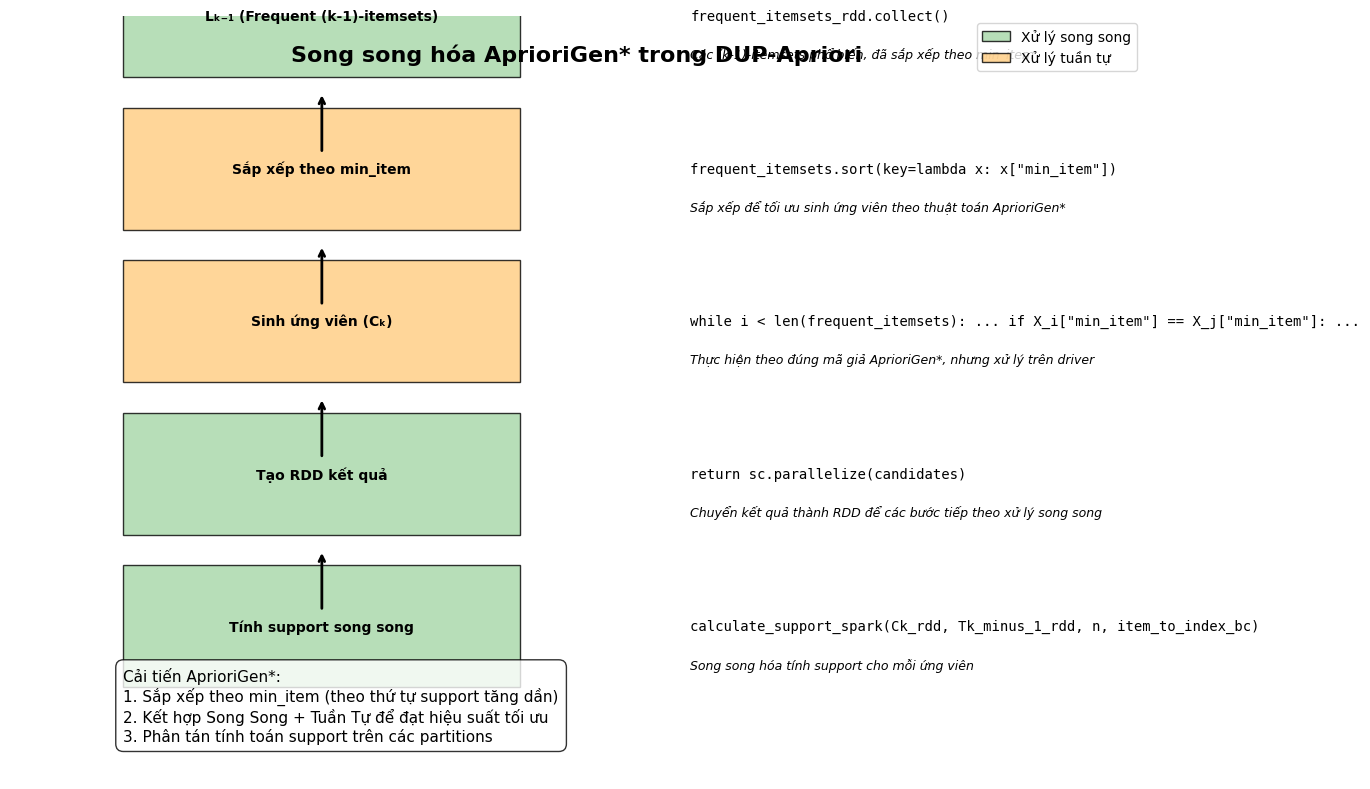

In [10]:
# Minh h·ªça c√°ch AprioriGen* ƒë∆∞·ª£c song song h√≥a
def visualize_apriorigen_star_parallel():
    # T·∫°o figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Thi·∫øt l·∫≠p h√¨nh ·∫£nh minh h·ªça
    stages = [
        {'name': 'L‚Çñ‚Çã‚ÇÅ (Frequent (k-1)-itemsets)', 'parallel': True, 
         'code': 'frequent_itemsets_rdd.collect()', 'desc': 'C√°c (k-1)-itemsets ph·ªï bi·∫øn, ƒë√£ s·∫Øp x·∫øp theo min_item'},
        {'name': 'S·∫Øp x·∫øp theo min_item', 'parallel': False, 
         'code': 'frequent_itemsets.sort(key=lambda x: x["min_item"])', 'desc': 'S·∫Øp x·∫øp ƒë·ªÉ t·ªëi ∆∞u sinh ·ª©ng vi√™n theo thu·∫≠t to√°n AprioriGen*'},
        {'name': 'Sinh ·ª©ng vi√™n (C‚Çñ)', 'parallel': False, 
         'code': 'while i < len(frequent_itemsets): ... if X_i["min_item"] == X_j["min_item"]: ...', 'desc': 'Th·ª±c hi·ªán theo ƒë√∫ng m√£ gi·∫£ AprioriGen*, nh∆∞ng x·ª≠ l√Ω tr√™n driver'},
        {'name': 'T·∫°o RDD k·∫øt qu·∫£', 'parallel': True, 
         'code': 'return sc.parallelize(candidates)', 'desc': 'Chuy·ªÉn k·∫øt qu·∫£ th√†nh RDD ƒë·ªÉ c√°c b∆∞·ªõc ti·∫øp theo x·ª≠ l√Ω song song'},
        {'name': 'T√≠nh support song song', 'parallel': True, 
         'code': 'calculate_support_spark(Ck_rdd, Tk_minus_1_rdd, n, item_to_index_bc)', 'desc': 'Song song h√≥a t√≠nh support cho m·ªói ·ª©ng vi√™n'}
    ]
    
    # V·∫Ω flowchart
    arrow_props = dict(arrowstyle='->', connectionstyle='arc3', linewidth=2, color='black')
    
    for i, stage in enumerate(stages):
        # V·ªã tr√≠ c·ªßa node
        y = 1 - i * 0.2
        
        # M√†u s·∫Øc d·ª±a v√†o song song hay kh√¥ng
        color = '#A5D6A7' if stage['parallel'] else '#FFCC80'
        
        # V·∫Ω node
        rect = plt.Rectangle((0.1, y - 0.08), 0.35, 0.16, facecolor=color, alpha=0.8, edgecolor='black')
        ax.add_patch(rect)
        
        # Th√™m text
        ax.text(0.275, y, stage['name'], ha='center', va='center', fontweight='bold')
        
        # Th√™m m√£ ngu·ªìn v√† m√¥ t·∫£
        ax.text(0.6, y, stage['code'], fontfamily='monospace', va='center', fontsize=10)
        ax.text(0.6, y - 0.05, stage['desc'], va='center', fontsize=9, style='italic')
        
        # Th√™m m≈©i t√™n k·∫øt n·ªëi
        if i < len(stages) - 1:
            ax.annotate('', xy=(0.275, y - 0.1), xytext=(0.275, y - 0.2 + 0.02),
                       arrowprops=arrow_props)
    
    # T·∫°o legend
    parallel_patch = plt.Rectangle((0, 0), 1, 1, facecolor='#A5D6A7', alpha=0.8, edgecolor='black')
    sequential_patch = plt.Rectangle((0, 0), 1, 1, facecolor='#FFCC80', alpha=0.8, edgecolor='black')
    ax.legend([parallel_patch, sequential_patch], ['X·ª≠ l√Ω song song', 'X·ª≠ l√Ω tu·∫ßn t·ª±'], loc='upper right')
    
    # Th√™m th√¥ng tin b·ªï sung
    ax.text(0.1, 0.05, 'C·∫£i ti·∫øn AprioriGen*:\n'
           '1. S·∫Øp x·∫øp theo min_item (theo th·ª© t·ª± support tƒÉng d·∫ßn)\n'
           '2. K·∫øt h·ª£p Song Song + Tu·∫ßn T·ª± ƒë·ªÉ ƒë·∫°t hi·ªáu su·∫•t t·ªëi ∆∞u\n'
           '3. Ph√¢n t√°n t√≠nh to√°n support tr√™n c√°c partitions',
           fontsize=11, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
    
    # Th√™m ti√™u ƒë·ªÅ
    ax.text(0.5, 0.95, 'Song song h√≥a AprioriGen* trong DUP-Apriori', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Thi·∫øt l·∫≠p tr·ª•c
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# V·∫Ω minh h·ªça
visualize_apriorigen_star_parallel()

## T·ªïng k·∫øt v·ªÅ song song h√≥a thu·∫≠t to√°n DUP-Apriori

Phi√™n b·∫£n song song h√≥a DUP-Apriori tr√™n Spark ƒë√£ t·∫≠n d·ª•ng hi·ªáu qu·∫£ c√°c ƒë·∫∑c t√≠nh c·ªßa m√¥ h√¨nh l·∫≠p tr√¨nh ph√¢n t√°n MapReduce th√¥ng qua Spark RDDs. Thu·∫≠t to√°n ƒë√£ song song h√≥a t·∫•t c·∫£ c√°c ph·∫ßn ch√≠nh c·ªßa DUP-Apriori, t·ª´ vi·ªác ƒë·∫øm t·∫ßn su·∫•t c·ªßa c√°c items, ti·ªÅn x·ª≠ l√Ω giao d·ªãch, t√≠nh to√°n support, cho ƒë·∫øn vi·ªác l·ªçc c√°c itemsets ph·ªï bi·∫øn v√† r√∫t g·ªçn transactions.

### C√°c c·∫£i ti·∫øn quan tr·ªçng nh·∫•t l√†:

1. **X·ª≠ l√Ω giao d·ªãch tr√πng l·∫∑p v·ªõi tr∆∞·ªùng `dup`**
   - Gom nh√≥m c√°c giao d·ªãch gi·ªëng nhau v√† s·ª≠ d·ª•ng tr∆∞·ªùng `dup` ƒë·ªÉ ƒë·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán
   - C·∫£i ti·∫øn tr·ªçng t√¢m trong d√≤ng 11: `c.sup += t[i].dup/n`

2. **S·∫Øp x·∫øp items theo support tƒÉng d·∫ßn v√† s·ª≠ d·ª•ng min/max ƒë·ªÉ t·ªëi ∆∞u h√≥a**
   - √Åp d·ª•ng min_item v√† max_item ƒë·ªÉ l·ªçc nhanh c√°c giao d·ªãch kh√¥ng th·ªÉ ch·ª©a candidate

3. **T·ªëi ∆∞u b·ªô nh·ªõ v√† t√≠nh to√°n ph√¢n t√°n**
   - S·ª≠ d·ª•ng broadcast, cache v√† unpersist ƒë·ªÉ qu·∫£n l√Ω b·ªô nh·ªõ
   - T·ª± ƒë·ªông t·ªëi ∆∞u s·ªë l∆∞·ª£ng partitions theo k√≠ch th∆∞·ªõc d·ªØ li·ªáu
   - Checkpointing ƒë·ªãnh k·ª≥ ƒë·ªÉ tr√°nh stack overflow

4. **C√¢n b·∫±ng gi·ªØa x·ª≠ l√Ω tu·∫ßn t·ª± v√† song song**
   - M·ªôt s·ªë ph·∫ßn nh∆∞ AprioriGen* v·∫´n gi·ªØ logic tu·∫ßn t·ª± ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh ch√≠nh x√°c
   - K·∫øt qu·∫£ ƒë∆∞·ª£c parallelize ƒë·ªÉ c√°c b∆∞·ªõc ti·∫øp theo x·ª≠ l√Ω song song

Nh·ªØng c·∫£i ti·∫øn n√†y gi√∫p thu·∫≠t to√°n x·ª≠ l√Ω hi·ªáu qu·∫£ c√°c t·∫≠p d·ªØ li·ªáu l·ªõn ph√¢n t√°n tr√™n c√°c node c·ªßa cluster Spark, v·ªõi hi·ªáu su·∫•t c·∫£i thi·ªán ƒë√°ng k·ªÉ khi k√≠ch th∆∞·ªõc d·ªØ li·ªáu tƒÉng.